# Semantic VS Syntatic Analysis

In [73]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

### Load Data

In [74]:
with open ("./data.txt", "r") as doc:
    corpus = doc.read()

In [75]:
#1. tokenization
corpus = [corpus.split(" ") for sent in corpus]
corpus[:20]

[['Harry',
  'Potter',
  'is',
  'a',
  'popular',
  'fantasy',
  'book',
  'series',
  'written',
  'by',
  'J.K.',
  'Rowling.',
  'The',
  'series',
  'consists',
  'of',
  'seven',
  'books,',
  'following',
  'the',
  'life',
  'and',
  'adventures',
  'of',
  'a',
  'young',
  'wizard',
  'named',
  'Harry',
  'Potter.',
  'The',
  'story',
  'begins',
  'with',
  'Harry',
  'discovering',
  'on',
  'his',
  'eleventh',
  'birthday',
  'that',
  'he',
  'is',
  'a',
  'wizard',
  'and',
  'has',
  'been',
  'accepted',
  'to',
  'Hogwarts',
  'School',
  'of',
  'Witchcraft',
  'and',
  'Wizardry.',
  'At',
  'Hogwarts,',
  'Harry',
  'makes',
  'friends',
  'such',
  'as',
  'Hermione',
  'Granger',
  'and',
  'Ron',
  'Weasley,',
  'and',
  'together',
  'they',
  'uncover',
  'mysteries',
  'and',
  'face',
  'various',
  'magical',
  'challenges.\n\nThe',
  'overarching',
  'plot',
  'revolves',
  'around',
  "Harry's",
  'struggle',
  'against',
  'the',
  'dark',
  'wizard'

### Tokenization

In [76]:
corpus_tokenized = corpus

In [77]:
flatten = lambda l: [item for sublist in l for item in sublist]
vocabs  = list(set(flatten(corpus_tokenized)))

In [78]:
len(vocabs)

159

In [79]:
vocabs.append('<UNK>') 

In [80]:
vocabs[-1]

'<UNK>'

### Numericalization

In [81]:
word2index = {v: idx for idx, v in enumerate(vocabs)}

In [82]:
word2index['<UNK>']

159

## Prep Train Data

In [96]:
#create pairs of center word, and outside word

def random_batch(batch_size, corpus):
    window_size = 2
    skipgrams = []

    #loop each corpus
    for doc in corpus:
        #look from the 2nd word until second last word
        for i in range(window_size, len(doc)-1):
            #center word
            center = word2index[doc[i]]
            #outside words = 2 words
            outside = (word2index[doc[i-1]], word2index[doc[i+1]])
            #for each of these two outside words, we gonna append to a list
            for each_out in outside:
                skipgrams.append([center, each_out])
                #center, outside1;   center, outside2
                
    random_index = np.random.choice(range(len(skipgrams)), batch_size, replace=False)
    
    inputs, labels = [], []
    for index in random_index:
        inputs.append([skipgrams[index][0]])
        labels.append([skipgrams[index][1]])
        
    return np.array(inputs), np.array(labels)
            
x, y = random_batch(2, corpus)

In [97]:
x.shape  #batch_size, 1

(2, 1)

In [98]:
y.shape

(2, 1)

## 1. Skipgram

In [83]:
#using window_size=2

skipgrams = []
window_size = 2

#for each corpus
for sent in corpus_tokenized:
    #for each sent ["apple", "banana", "fruit"]
    for i in range(window_size, len(sent) - 1): #start from 2 to second last
        center_word = sent[i]
        outside_words = [sent[i-1], sent[i+1]]  #window_size = 2
        for o in outside_words:
            skipgrams.append([center_word, o])

skipgrams
        
#here we want to create (banana, apple), (banana, fruit) append to some list
    

[['is', 'Potter'],
 ['is', 'a'],
 ['a', 'is'],
 ['a', 'popular'],
 ['popular', 'a'],
 ['popular', 'fantasy'],
 ['fantasy', 'popular'],
 ['fantasy', 'book'],
 ['book', 'fantasy'],
 ['book', 'series'],
 ['series', 'book'],
 ['series', 'written'],
 ['written', 'series'],
 ['written', 'by'],
 ['by', 'written'],
 ['by', 'J.K.'],
 ['J.K.', 'by'],
 ['J.K.', 'Rowling.'],
 ['Rowling.', 'J.K.'],
 ['Rowling.', 'The'],
 ['The', 'Rowling.'],
 ['The', 'series'],
 ['series', 'The'],
 ['series', 'consists'],
 ['consists', 'series'],
 ['consists', 'of'],
 ['of', 'consists'],
 ['of', 'seven'],
 ['seven', 'of'],
 ['seven', 'books,'],
 ['books,', 'seven'],
 ['books,', 'following'],
 ['following', 'books,'],
 ['following', 'the'],
 ['the', 'following'],
 ['the', 'life'],
 ['life', 'the'],
 ['life', 'and'],
 ['and', 'life'],
 ['and', 'adventures'],
 ['adventures', 'and'],
 ['adventures', 'of'],
 ['of', 'adventures'],
 ['of', 'a'],
 ['a', 'of'],
 ['a', 'young'],
 ['young', 'a'],
 ['young', 'wizard'],
 ['wiza

In [84]:
#let's make what we have made into a function (batch function)
#return a batches of data, e.g., =2 --> ['banana', 'apple'], ['banana', 'fruit']
#also i want these batches to be id, NOT token   --> [5, 4]

def random_batch(batch_size, corpus):
    
    skipgrams = []

    #for each corpus
    for sent in corpus_tokenized:
        #for each sent ["apple", "banana", "fruit"]
        for i in range(2, len(sent) - 1): #start from 1 to second last
            center_word = word2index[sent[i]]
            outside_words = [word2index[sent[i-1]], word2index[sent[i+1]]]  #window_size = 2
            for o in outside_words:
                skipgrams.append([center_word, o])
                
    #only get a batch, not the entire list
    random_index = np.random.choice(range(len(skipgrams)), batch_size, replace=False)
             
    #appending some list of inputs and labels
    random_inputs, random_labels = [], []   
    for index in random_index:
        random_inputs.append([skipgrams[index][0]])  #center words, this will be a shape of (1, ) --> (1, 1) for modeling
        random_labels.append([skipgrams[index][1]])
        
    return np.array(random_inputs), np.array(random_labels)
    

In [85]:
input, label = random_batch(10, corpus_tokenized)

print(f"{input.shape}")
print(f"{label=}")

(10, 1)
label=array([[ 78],
       [ 78],
       [158],
       [ 75],
       [ 53],
       [ 89],
       [103],
       [131],
       [ 94],
       [114]])


## 3. Model

$$J(\theta) = -\frac{1}{T}\sum_{t=1}^{T}\sum_{\substack{-m \leq j \leq m \\ j \neq 0}}\log P(w_{t+j} | w_t; \theta)$$

where $P(w_{t+j} | w_t; \theta) = $

$$P(o|c)=\frac{\exp(\mathbf{u_o^{\top}v_c})}{\sum_{w=1}^V\exp(\mathbf{u_w^{\top}v_c})}$$

where $o$ is the outside words and $c$ is the center word

In [86]:
voc_size = len(vocabs)
voc_size

160

In [87]:
vocabs

['Hogwarts,',
 'the',
 'face',
 'to',
 'dark',
 'faces',
 'a',
 'that',
 'magical',
 'Hermione',
 'are',
 'series',
 'Lord',
 'conclusion',
 'praised',
 'begins',
 'overarching',
 'is',
 'Cup,',
 'explores',
 'Ron',
 'friends',
 'challenges.\n\nThe',
 'Voldemort',
 'revelations.',
 'since',
 'The',
 'certain',
 'Deathly',
 "Harry's",
 'with',
 'battle',
 '"Harry',
 'become',
 'reveals',
 'School',
 'families,',
 'phenomenon',
 'has',
 'learns',
 'Witchcraft',
 'against',
 'connection',
 'struggle',
 'challenges,',
 'brings',
 'they',
 'life',
 'its',
 'also',
 'eleventh',
 'about',
 'losses,',
 'Stone,',
 'in',
 'subjugate',
 'evil',
 'prevalent.',
 'Wizardry.',
 'together',
 'successful',
 'Weasley,',
 'Hallows.\n\nThe',
 'he',
 'Triwizard',
 'Hogwarts.',
 'all',
 'been',
 'delves',
 'book',
 'discovering',
 'non-magical',
 'wizarding',
 'uncover',
 'revolves',
 'books,',
 'by',
 'numerous',
 'and',
 'series,',
 'histories',
 'birthday',
 'It',
 'adapted',
 'At',
 'rich',
 'various',


$$P(o|c)=\frac{\exp(\mathbf{u_o^{\top}v_c})}{\sum_{w=1}^V\exp(\mathbf{u_w^{\top}v_c})}$$

In [99]:
class Skipgram(nn.Module):
    
    def __init__(self, voc_size, emb_size):
        super(Skipgram, self).__init__()
        self.embedding_center  = nn.Embedding(voc_size, emb_size)
        self.embedding_outside = nn.Embedding(voc_size, emb_size)
    
    def forward(self, center, outside, all_vocabs):
        center_embedding     = self.embedding_center(center)  #(batch_size, 1, emb_size)
        outside_embedding    = self.embedding_center(outside) #(batch_size, 1, emb_size)
        all_vocabs_embedding = self.embedding_center(all_vocabs) #(batch_size, voc_size, emb_size)
        
        top_term = torch.exp(outside_embedding.bmm(center_embedding.transpose(1, 2)).squeeze(2))
        #batch_size, 1, emb_size) @ (batch_size, emb_size, 1) = (batch_size, 1, 1) = (batch_size, 1) 

        lower_term = all_vocabs_embedding.bmm(center_embedding.transpose(1, 2)).squeeze(2)
        #batch_size, voc_size, emb_size) @ (batch_size, emb_size, 1) = (batch_size, voc_size, 1) = (batch_size, voc_size) 
        
        lower_term_sum = torch.sum(torch.exp(lower_term), 1)  #(batch_size, 1)
        
        loss = -torch.mean(torch.log(top_term / lower_term_sum))  #scalar
        
        return loss
        

In [100]:
#prepare all vocabs

batch_size = 2
voc_size   = len(vocabs)

def prepare_sequence(seq, word2index):
    idxs = list(map(lambda w: word2index[w] if word2index.get(w) is not None else word2index["<UNK>"], seq))
    return torch.LongTensor(idxs)

all_vocabs = prepare_sequence(list(vocabs), word2index).expand(batch_size, voc_size)
all_vocabs

tensor([[  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
          14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,
          28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,
          42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,
          56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,
          70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,
          84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,
          98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111,
         112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125,
         126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139,
         140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153,
         154, 155, 156, 157, 158, 159],
        [  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
          14

In [101]:
input_tensor, label_tensor = random_batch(batch_size, corpus_tokenized)
input_tensor #center word

array([[142],
       [  6]])

In [102]:
label

array([[ 78],
       [ 78],
       [158],
       [ 75],
       [ 53],
       [ 89],
       [103],
       [131],
       [ 94],
       [114]])

In [103]:
emb_size = 2 #usually, this can be 50, 100, or 300
model = Skipgram(voc_size, emb_size)

In [104]:
input_tensor = torch.LongTensor(x)  
label_tensor = torch.LongTensor(y)

In [106]:
loss = model(input_tensor, label_tensor, all_vocabs)

In [107]:
loss

tensor(8.5143, grad_fn=<NegBackward0>)

## 4. Training

In [108]:
batch_size = 2 #why?  no reason; 
emb_size   = 2 #why?  no reason; usually 50, 100, 300, but 2 so we can plot (50 can also plot, but need PCA)
skipgram_model      = Skipgram(voc_size, emb_size)

optimizer  = optim.Adam(model.parameters(), lr=0.001)

In [109]:
def epoch_time(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    return elapsed_mins, elapsed_secs

In [110]:
num_epochs = 10
#for epoch
for epoch in range(num_epochs):
    #get random batch
    input_batch, label_batch = random_batch(batch_size, corpus)
    input_batch = torch.LongTensor(input_batch)
    label_batch = torch.LongTensor(label_batch)
    
    # print(input_batch.shape, label_batch.shape, all_vocabs.shape)
    
    #loss = model
    loss = skipgram_model(input_batch, label_batch, all_vocabs)
    
    #backpropagate
    loss.backward()
    
    #update alpha
    optimizer.step()
    
    #print epoch loss
#     if (epoch + 1) % 1000 == 0:
    print(f"Epoch {epoch+1} | Loss: {loss:.6f} | Time: ??")

Epoch 1 | Loss: 4.590849 | Time: ??
Epoch 2 | Loss: 5.317753 | Time: ??
Epoch 3 | Loss: 7.993393 | Time: ??
Epoch 4 | Loss: 4.580986 | Time: ??
Epoch 5 | Loss: 5.664652 | Time: ??
Epoch 6 | Loss: 4.279426 | Time: ??
Epoch 7 | Loss: 6.104391 | Time: ??
Epoch 8 | Loss: 5.139246 | Time: ??
Epoch 9 | Loss: 5.271609 | Time: ??
Epoch 10 | Loss: 5.311109 | Time: ??


## 5. Plot the embeddings

Is really the related stuff are close to each other, and vice versa?

The most fun part:  Will "banana" closer to "fruit" than "cat"?

In [115]:
def get_embed(word):
    try:
        index = word2index[word]
    except:
        index = word2index['<UNK>']
        
    word = torch.LongTensor([word2index[word]])
    
    embed_c = model.embedding_center(word)
    embed_o = model.embedding_outside(word)
    embed   = (embed_c + embed_o) / 2
    
    return embed[0][0].item(), embed[0][1].item()

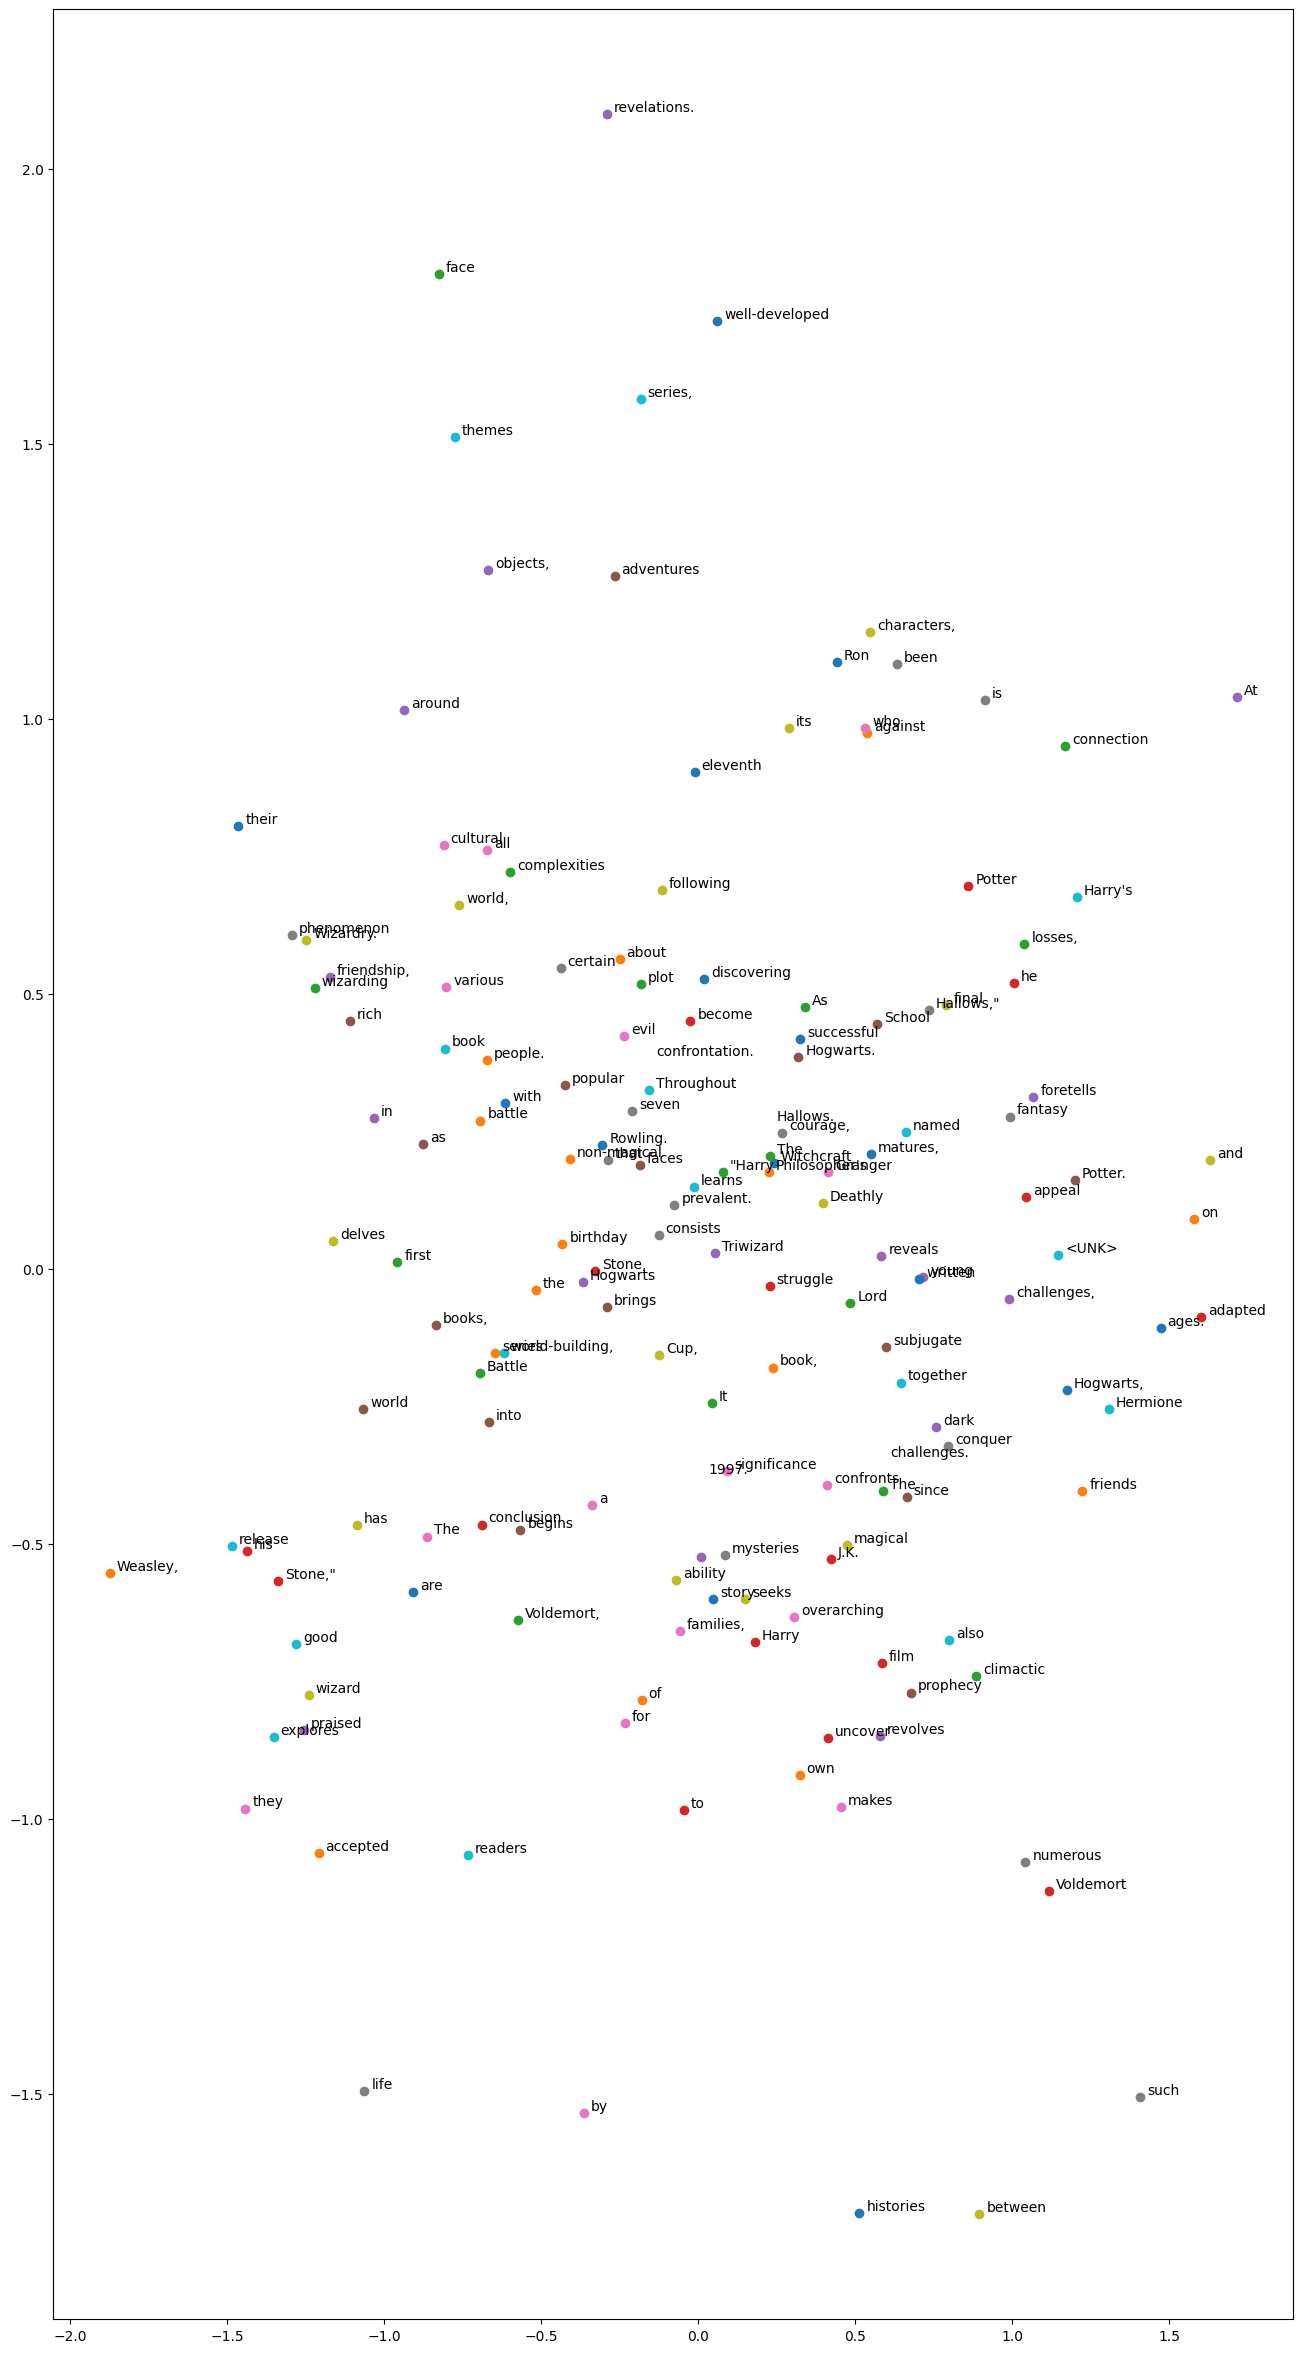

In [116]:
plt.figure(figsize=(16, 30))
for i, word in enumerate(vocabs):
    x, y = get_embed(word)
    plt.scatter(x, y)
    plt.annotate(word, xy=(x, y), xytext=(5, 2), textcoords='offset points')
plt.show()

## 2. GloVe

## Co-occurrence matrix

Count the occurrences of pair of words using window size of 1 (you can use 2, 3, 4, up to you.)

E.g., Dog loves to eat meat.     

['dog', 'loves', 1], ['loves', 'to', 1]

In [117]:
#use Counter to first count stuffs
from collections import Counter

# print(corpus_tokenized)

#count the frequency of each word....
#we somehow need this to calculate the probability Pi
X_i = Counter(flatten(corpus_tokenized)) #merge all list....(flatten is a function I define.....)

# X_i['apple'] #get the probability of apple

In [118]:
#define a skipgram of window size 2
skip_grams = []
window_size = 2

#loop through each corpus
for sent in corpus_tokenized:  #['apple', 'banana', 'fruit']
    #loop through each word from 1 to n-1 (because 0 and n has no context window)
    for i in range(window_size, len(sent)-1):
        target  = sent[i]
        context = [sent[i+1], sent[i-1]]
        #append(i, i+1) and append(i, i-1)
        for c in context:
            skip_grams.append((target, c))

In [119]:
X_ik_skipgram = Counter(skip_grams)
X_ik_skipgram

Counter({('and', 'the'): 8295,
         ('the', 'and'): 8295,
         ('is', 'a'): 3318,
         ('a', 'is'): 3318,
         ('The', 'series'): 3318,
         ('series', 'The'): 3318,
         ('The', 'story'): 3318,
         ('story', 'The'): 3318,
         ('and', 'has'): 3318,
         ('has', 'been'): 3318,
         ('has', 'and'): 3318,
         ('been', 'has'): 3318,
         ('such', 'as'): 3318,
         ('as', 'such'): 3318,
         ('of', 'the'): 3318,
         ('the', 'of'): 3318,
         ('the', "Philosopher's"): 3318,
         ("Philosopher's", 'the'): 3318,
         ('the', 'Deathly'): 3318,
         ('Deathly', 'the'): 3318,
         ('book,', '"Harry'): 3318,
         ('"Harry', 'Potter'): 3318,
         ('"Harry', 'book,'): 3318,
         ('Potter', 'and'): 3318,
         ('Potter', '"Harry'): 3318,
         ('and', 'Potter'): 3318,
         ('to', 'appeal'): 3318,
         ('appeal', 'to'): 3318,
         ('is', 'Potter'): 1659,
         ('a', 'popular'): 1659,
  

## Weighting function f

In [120]:
def weighting(w_i, w_j, X_ik):   #why we need w_i and w_j, because we can try its co-occurrences, if it's too big, we scale it down
    
    #check whether the co-occurrences between these two word exists???
    try:
        x_ij = X_ik[(w_i, w_j)]
    except:
        x_ij = 1  #why one, so that the probability thingy won't break...(label smoothing)
        
    #maximum co-occurrences; we follow the paper
    x_max = 100
    alpha = 0.75
    
    #if the co-occurrences does not exceed x_max, scale it down based on some alpha
    if x_ij < x_max:
        result = (x_ij/x_max) ** alpha
    else:
        result = 1 #this is the maximum probability you can have
        
    return result

In [121]:
w_i  = 'Harry'
w_j  = 'Hogwarts'
w_j2 = 'Sonu'

print(weighting(w_i, w_j, X_ik_skipgram))   #scales from 1 to 0.0316
print(weighting(w_i, w_j2, X_ik_skipgram))  #the paper says that f(0) = 0

0.0
0.0


In [122]:
#now apply this weighting to all possible pairs
from itertools import combinations_with_replacement

X_ik = {} #for keeping the co-occurrences
weighting_dic = {} #for keeping all the probability after passing through the weighting function

for bigram in combinations_with_replacement(vocabs, 2):  #we need to also think its reverse
    #if this bigram exists in X_ik_skipgrams
    #we gonna add this to our co-occurence matrix
    if X_ik_skipgram.get(bigram) is not None:
        cooc = X_ik_skipgram[bigram]  #get the co-occurrence
        X_ik[bigram] = cooc + 1 #this is again basically label smoothing....(stability issues (especially when divide something))
        X_ik[(bigram[1], bigram[0])] = cooc + 1  #trick to get all pairs
    else: #otherwise, do nothing
        pass
    
    #apply the weighting function using this co-occurrence matrix thingy    
    weighting_dic[bigram] = weighting(bigram[0], bigram[1], X_ik)
    weighting_dic[(bigram[1], bigram[0])] = weighting(bigram[1], bigram[0], X_ik)
    

In [123]:
len(X_ik_skipgram)

468

In [124]:
X_ik

{('Hogwarts,', 'At'): 1660,
 ('At', 'Hogwarts,'): 1660,
 ('Hogwarts,', 'Harry'): 1660,
 ('Harry', 'Hogwarts,'): 1660,
 ('the', 'dark'): 1660,
 ('dark', 'the'): 1660,
 ('the', 'magical'): 1660,
 ('magical', 'the'): 1660,
 ('the', 'series'): 1660,
 ('series', 'the'): 1660,
 ('the', 'explores'): 1660,
 ('explores', 'the'): 1660,
 ('the', 'since'): 1660,
 ('since', 'the'): 1660,
 ('the', 'Deathly'): 3319,
 ('Deathly', 'the'): 3319,
 ('the', 'battle'): 1660,
 ('battle', 'the'): 1660,
 ('the', 'reveals'): 1660,
 ('reveals', 'the'): 1660,
 ('the', 'against'): 1660,
 ('against', 'the'): 1660,
 ('the', 'brings'): 1660,
 ('brings', 'the'): 1660,
 ('the', 'life'): 1660,
 ('life', 'the'): 1660,
 ('the', 'Stone,'): 1660,
 ('Stone,', 'the'): 1660,
 ('the', 'in'): 1660,
 ('in', 'the'): 1660,
 ('the', 'Triwizard'): 1660,
 ('Triwizard', 'the'): 1660,
 ('the', 'wizarding'): 1660,
 ('wizarding', 'the'): 1660,
 ('the', 'and'): 8296,
 ('and', 'the'): 8296,
 ('the', 'series,'): 1660,
 ('series,', 'the'): 16

###  Prepare train data
You move the window along, and create those tuples as we said in class

In [125]:
for c in corpus_tokenized:
    print(c)

['Harry', 'Potter', 'is', 'a', 'popular', 'fantasy', 'book', 'series', 'written', 'by', 'J.K.', 'Rowling.', 'The', 'series', 'consists', 'of', 'seven', 'books,', 'following', 'the', 'life', 'and', 'adventures', 'of', 'a', 'young', 'wizard', 'named', 'Harry', 'Potter.', 'The', 'story', 'begins', 'with', 'Harry', 'discovering', 'on', 'his', 'eleventh', 'birthday', 'that', 'he', 'is', 'a', 'wizard', 'and', 'has', 'been', 'accepted', 'to', 'Hogwarts', 'School', 'of', 'Witchcraft', 'and', 'Wizardry.', 'At', 'Hogwarts,', 'Harry', 'makes', 'friends', 'such', 'as', 'Hermione', 'Granger', 'and', 'Ron', 'Weasley,', 'and', 'together', 'they', 'uncover', 'mysteries', 'and', 'face', 'various', 'magical', 'challenges.\n\nThe', 'overarching', 'plot', 'revolves', 'around', "Harry's", 'struggle', 'against', 'the', 'dark', 'wizard', 'Lord', 'Voldemort,', 'who', 'seeks', 'to', 'conquer', 'the', 'wizarding', 'world', 'and', 'subjugate', 'non-magical', 'people.', 'Harry', 'learns', 'about', 'his', 'own', '

In [126]:
skip_grams

[('is', 'a'),
 ('is', 'Potter'),
 ('a', 'popular'),
 ('a', 'is'),
 ('popular', 'fantasy'),
 ('popular', 'a'),
 ('fantasy', 'book'),
 ('fantasy', 'popular'),
 ('book', 'series'),
 ('book', 'fantasy'),
 ('series', 'written'),
 ('series', 'book'),
 ('written', 'by'),
 ('written', 'series'),
 ('by', 'J.K.'),
 ('by', 'written'),
 ('J.K.', 'Rowling.'),
 ('J.K.', 'by'),
 ('Rowling.', 'The'),
 ('Rowling.', 'J.K.'),
 ('The', 'series'),
 ('The', 'Rowling.'),
 ('series', 'consists'),
 ('series', 'The'),
 ('consists', 'of'),
 ('consists', 'series'),
 ('of', 'seven'),
 ('of', 'consists'),
 ('seven', 'books,'),
 ('seven', 'of'),
 ('books,', 'following'),
 ('books,', 'seven'),
 ('following', 'the'),
 ('following', 'books,'),
 ('the', 'life'),
 ('the', 'following'),
 ('life', 'and'),
 ('life', 'the'),
 ('and', 'adventures'),
 ('and', 'life'),
 ('adventures', 'of'),
 ('adventures', 'and'),
 ('of', 'a'),
 ('of', 'adventures'),
 ('a', 'young'),
 ('a', 'of'),
 ('young', 'wizard'),
 ('young', 'a'),
 ('wiza

In [127]:
import math

def random_batch(batch_size, word_sequence, skip_grams, X_ik, weighting_dic):
    
    #loop through this skipgram, and change it id  because when sending model, it must number
    skip_grams_id = [(word2index[skip_gram[0]], word2index[skip_gram[1]]) for skip_gram in skip_grams]
    
    #randomly pick "batch_size" indexes
    number_of_choices = len(skip_grams_id)
    random_index = np.random.choice(number_of_choices, batch_size, replace=False) #no repeating indexes among these random indexes
    
    random_inputs = [] #xi, wi (in batches)
    random_labels = [] #xj, wj (in batches)
    random_coocs  = [] #Xij (in batches)
    random_weighting = [] #f(Xij) (in batches)
    #for each of the sample in these indexes
    for i in random_index:
        random_inputs.append([skip_grams_id[i][0]]) #same reason why i put bracket here....
        random_labels.append([skip_grams_id[i][1]])
        
        #get cooc
        #first check whether it exists...
        pair = skip_grams[i]  #e.g., ('banana', 'fruit)
        try:
            cooc = X_ik[pair]
        except:
            cooc = 1 #label smoothing
            
        random_coocs.append([math.log(cooc)])  #1. why log, #2, why bracket -> size ==> (, 1)  #my neural network expects (, 1)
        
        #get weighting
        weighting = weighting_dic[pair]  #why not use try....maybe it does not exist....
        random_weighting.append(weighting)

        
    return np.array(random_inputs), np.array(random_labels), np.array(random_coocs), np.array(random_weighting)
    

In [128]:
batch_size = 2
input, target, cooc, weightin = random_batch(batch_size, corpus_tokenized, skip_grams, X_ik, weighting_dic)

In [129]:
input, target, cooc, weightin

(array([[11],
        [63]]),
 array([[38],
        [ 5]]),
 array([[7.41457288],
        [7.41457288]]),
 array([1, 1]))

## Model

In [130]:
class GloVe(nn.Module):
    
    def __init__(self, vocab_size,embed_size):
        super(GloVe,self).__init__()
        self.embedding_v = nn.Embedding(vocab_size, embed_size) # center embedding
        self.embedding_u = nn.Embedding(vocab_size, embed_size) # out embedding
        
        self.v_bias = nn.Embedding(vocab_size, 1)
        self.u_bias = nn.Embedding(vocab_size, 1)
        
    def forward(self, center_words, target_words, coocs, weighting):
        center_embeds = self.embedding_v(center_words) # [batch_size, 1, emb_size]
        target_embeds = self.embedding_u(target_words) # [batch_size, 1, emb_size]
        
        center_bias = self.v_bias(center_words).squeeze(1)
        target_bias = self.u_bias(target_words).squeeze(1)
        
        inner_product = target_embeds.bmm(center_embeds.transpose(1, 2)).squeeze(2)
        #[batch_size, 1, emb_size] @ [batch_size, emb_size, 1] = [batch_size, 1, 1] = [batch_size, 1]
        
        #note that coocs already got log
        loss = weighting*torch.pow(inner_product +center_bias + target_bias - coocs, 2)
        
        return torch.sum(loss)

## Training

In [132]:
voc_size   = len(vocabs)
batch_size = 2 #why?  no reason; 
emb_size   = 2 #why?  no reason; usually 50, 100, 300, but 2 so we can plot (50 can also plot, but need PCA)
glove_model      = GloVe(voc_size, emb_size)

optimizer  = optim.Adam(model.parameters(), lr=0.001)

In [133]:
def epoch_time(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    return elapsed_mins, elapsed_secs

In [134]:
num_epochs = 10
#for epoch
for epoch in range(num_epochs):

    #get random batch
    input, target, cooc, weightin = random_batch(batch_size, corpus_tokenized, skip_grams, X_ik, weighting_dic)
    input_batch    = torch.LongTensor(input)
    target_batch   = torch.LongTensor(target)
    cooc_batch     = torch.FloatTensor(cooc)
    weightin_batch = torch.FloatTensor(weightin)
    
    
    # print(input_batch.shape, label_batch.shape, cooc_batch.shape, weightin_batch)
    
    #loss = model
    loss = glove_model(input_batch, target_batch, cooc_batch, weightin_batch)
    
    #backpropagate
    loss.backward()
    
    #update alpha
    optimizer.step()
    
    #print epoch loss
    # if (epoch + 1) % 1000 == 0:
    print(f"Epoch {epoch+1} | Loss: {loss:.6f} | Time: ??")

Epoch 1 | Loss: 296.220825 | Time: ??
Epoch 2 | Loss: 182.611191 | Time: ??
Epoch 3 | Loss: 106.462463 | Time: ??
Epoch 4 | Loss: 245.601944 | Time: ??
Epoch 5 | Loss: 229.088821 | Time: ??
Epoch 6 | Loss: 253.511093 | Time: ??
Epoch 7 | Loss: 284.611267 | Time: ??
Epoch 8 | Loss: 325.400085 | Time: ??
Epoch 9 | Loss: 99.128754 | Time: ??
Epoch 10 | Loss: 205.135925 | Time: ??


In [135]:
glove_model.state_dict()

OrderedDict([('embedding_v.weight',
              tensor([[-9.7224e-01, -6.7203e-01],
                      [-1.4039e-02, -2.2830e-01],
                      [-1.8342e-02, -3.0682e-01],
                      [-1.0711e+00, -1.9604e+00],
                      [ 3.0327e-01,  9.4033e-01],
                      [ 3.4659e-02, -1.1751e+00],
                      [ 8.6205e-01, -1.5309e-01],
                      [ 4.0750e-01, -1.3691e+00],
                      [-3.4141e-01,  2.4988e-01],
                      [ 8.6719e-01, -4.3932e-01],
                      [-9.4410e-01, -1.1384e+00],
                      [-7.7471e-01,  2.5924e+00],
                      [-1.8969e+00, -1.2367e+00],
                      [ 3.5922e-01, -1.2955e-01],
                      [-1.9235e+00, -2.2592e-01],
                      [ 1.3387e-01, -6.7585e-01],
                      [ 1.5531e+00,  2.6056e-01],
                      [ 5.4190e-01,  5.5727e-01],
                      [-9.2551e-02,  7.2409e-01],
              

## Plot Embeddings

In [136]:
def get_embed_glove(word,model):
    try:
        index = word2index[word]
    except:
        index = word2index['<UNK>']
    
    word = torch.LongTensor([index])

    center_embed  = model.embedding_v(word)
    outside_embed = model.embedding_u(word)
    
    embed = (center_embed + outside_embed) / 2
    
    return np.array(embed[0].detach().numpy())

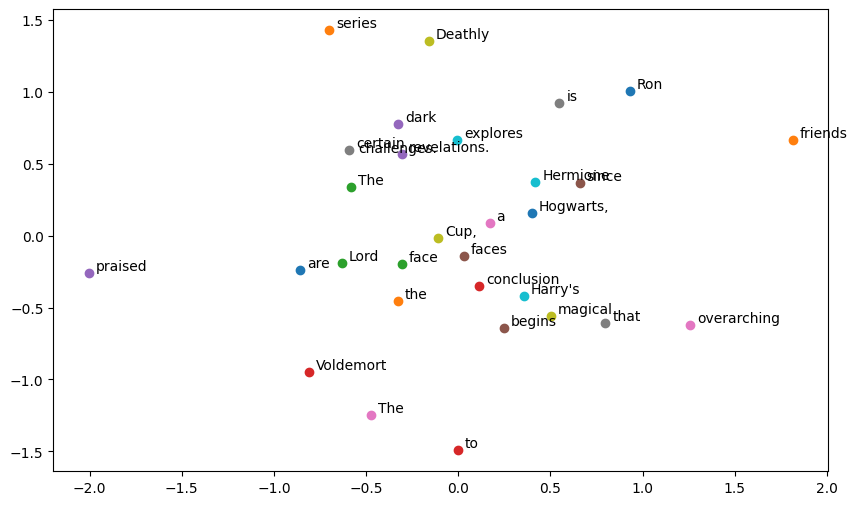

In [137]:
#help me plot fruit cat banana on matplotlib
plt.figure(figsize=(10,6))
for i, word in enumerate(vocabs[:30]): #loop each unique vocab
    x, y = get_embed_glove(word,glove_model)
    plt.scatter(x, y)
    plt.annotate(word, xy=(x, y), xytext=(5, 2), textcoords='offset points')
plt.show()

## 3. Neg Skipgram

In [139]:
def negative_sampling_random_batch(batch_size, word_sequence):
    
    # Make skip gram of one size window
    skip_grams = []
    # loop each word sequence
    # we starts from 1 because 0 has no context
    # we stop at second last for the same reason
    for sent in corpus_tokenized:
        for i in range(1, len(sent) - 1):
            target = word2index[sent[i]]
            context = [word2index[sent[i - 1]], word2index[sent[i + 1]]]
            for w in context:
                skip_grams.append([target, w])
    
    random_inputs = []
    random_labels = []
    random_index = np.random.choice(range(len(skip_grams)), batch_size, replace=False) #randomly pick without replacement
        
    for i in random_index:
        random_inputs.append([skip_grams[i][0]])  # target, e.g., 2
        random_labels.append([skip_grams[i][1]])  # context word, e.g., 3
            
    return np.array(random_inputs), np.array(random_labels)

In [141]:
#testing the method
batch_size = 2 # mini-batch size
input_batch, target_batch = negative_sampling_random_batch(batch_size, corpus)

print("Input: ",  input_batch)
print("Target: ", target_batch)

#we will convert them to tensor during training, so don't worry...

Input:  [[132]
 [ 78]]
Target:  [[1]
 [2]]


### Unigram Table

In [142]:
from collections import Counter

word_count = Counter(flatten(corpus_tokenized))
num_total_words = sum([c for w, c in word_count.items()])
word_count[',']

0

In [143]:
Z = 0.001

unigram_table = []

for vo in vocabs:
    unigram_table.extend([vo] * int(((word_count[vo]/num_total_words)**0.75)/Z))

In [146]:
import random

def prepare_sequence(seq, word2index):
    idxs = list(map(lambda w: word2index[w] if word2index.get(w) is not None else word2index["<UNK>"], seq))
    return torch.LongTensor(idxs)

def negative_sampling(targets, unigram_table, k):
    batch_size = targets.size(0)
    neg_samples = []
    for i in range(batch_size):
        nsample = []
        target_index = targets[i].item()
        while len(nsample) < k: # num of sampling
            neg = random.choice(unigram_table)
            if word2index[neg] == target_index:
                continue
            nsample.append(neg)
        neg_samples.append(prepare_sequence(nsample, word2index).view(1, -1))
    
    return torch.cat(neg_samples)

In [147]:
input_batch  = torch.Tensor(input_batch)
target_batch = torch.LongTensor(target_batch)
num_neg = 3
negative_sampling(target_batch, unigram_table, num_neg)

tensor([[ 29,  95,  38],
        [112, 118,  48]])

### Model

In [148]:
class SkipgramNegSampling(nn.Module):
    
    def __init__(self, vocab_size, emb_size):
        super(SkipgramNegSampling, self).__init__()
        self.embedding_v = nn.Embedding(vocab_size, emb_size) # center embedding
        self.embedding_u = nn.Embedding(vocab_size, emb_size) # out embedding
        self.logsigmoid = nn.LogSigmoid()
                    
    def forward(self, center_words, target_words, negative_words):
        center_embeds = self.embedding_v(center_words) # [batch_size, 1, emb_size]
        target_embeds = self.embedding_u(target_words) # [batch_size, 1, emb_size]
        neg_embeds    = -self.embedding_u(negative_words) # [batch_size, num_neg, emb_size]
        
        positive_score = target_embeds.bmm(center_embeds.transpose(1, 2)).squeeze(2)
        #[batch_size, 1, emb_size] @ [batch_size, emb_size, 1] = [batch_size, 1, 1] = [batch_size, 1]
        
        negative_score = neg_embeds.bmm(center_embeds.transpose(1, 2))
        #[batch_size, k, emb_size] @ [batch_size, emb_size, 1] = [batch_size, k, 1]
        
        loss = self.logsigmoid(positive_score) + torch.sum(self.logsigmoid(negative_score), 1)
                
        return -torch.mean(loss)
    
    def prediction(self, inputs):
        embeds = self.embedding_v(inputs)
        
        return embeds

### Training

In [149]:
batch_size     = 2 # mini-batch size
embedding_size = 2 #so we can later plot
model_neg_skip          = SkipgramNegSampling(voc_size, embedding_size)
num_neg        = 10 # num of negative sampling

optimizer = optim.Adam(model.parameters(), lr=0.001)

In [150]:
def epoch_time(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    return elapsed_mins, elapsed_secs

In [151]:
import time

# Training
num_epochs = 10
start = time.time()
for epoch in range(num_epochs):
    
    input_batch, target_batch = negative_sampling_random_batch(batch_size, corpus)
    
    #input_batch: [batch_size, 1]
    input_batch = torch.LongTensor(input_batch)
    
    #target_batch: [batch_size, 1]
    target_batch = torch.LongTensor(target_batch)
    
    #negs_batch:   [batch_size, num_neg]
    negs_batch = negative_sampling(target_batch, unigram_table, num_neg)
    
    optimizer.zero_grad()
        
    loss = model_neg_skip(input_batch, target_batch, negs_batch)
    
    end = time.time()
    
    epoch_mins, epoch_secs = epoch_time(start, end)
    
    loss.backward()
    optimizer.step()

#     if (epoch + 1) % 1000 == 0:
    print(f"Epoch: {epoch + 1} | cost: {loss:.6f} | time: {epoch_mins}m {epoch_secs}s")

Epoch: 1 | cost: 10.204714 | time: 0m 0s
Epoch: 2 | cost: 10.230791 | time: 0m 1s
Epoch: 3 | cost: 8.134346 | time: 0m 2s
Epoch: 4 | cost: 11.439986 | time: 0m 2s
Epoch: 5 | cost: 9.223076 | time: 0m 3s
Epoch: 6 | cost: 9.193792 | time: 0m 3s
Epoch: 7 | cost: 7.387914 | time: 0m 4s
Epoch: 8 | cost: 7.271992 | time: 0m 5s
Epoch: 9 | cost: 9.252522 | time: 0m 5s
Epoch: 10 | cost: 10.328120 | time: 0m 6s


### Plotting

In [152]:
def get_embed_neg_skip(word):
    id_tensor = torch.LongTensor([word2index[word]])
    v_embed = model_neg_skip.embedding_v(id_tensor)
    u_embed = model_neg_skip.embedding_u(id_tensor) 
    word_embed = (v_embed + u_embed) / 2 
    x, y = word_embed[0][0].item(), word_embed[0][1].item()

    return x, y

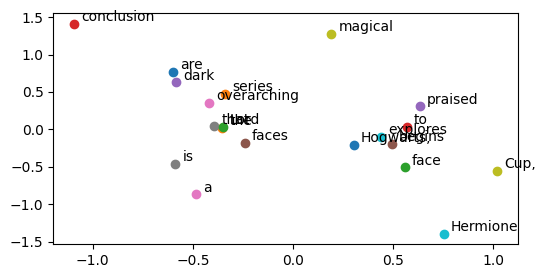

In [153]:
plt.figure(figsize=(6,3))
for i, word in enumerate(vocabs[:20]): #loop each unique vocab
    x, y = get_embed_neg_skip(word)
    plt.scatter(x, y)
    plt.annotate(word, xy=(x, y), xytext=(5, 2), textcoords='offset points')
plt.show()

## Testing / Inference

In [154]:
## Save models

torch.save(skipgram_model.state_dict(), 'skipgram.pkl')

In [155]:
torch.save(glove_model.state_dict(), 'glove.pkl')

In [157]:
glove_model.state_dict()

OrderedDict([('embedding_v.weight',
              tensor([[-9.7224e-01, -6.7203e-01],
                      [-1.4039e-02, -2.2830e-01],
                      [-1.8342e-02, -3.0682e-01],
                      [-1.0711e+00, -1.9604e+00],
                      [ 3.0327e-01,  9.4033e-01],
                      [ 3.4659e-02, -1.1751e+00],
                      [ 8.6205e-01, -1.5309e-01],
                      [ 4.0750e-01, -1.3691e+00],
                      [-3.4141e-01,  2.4988e-01],
                      [ 8.6719e-01, -4.3932e-01],
                      [-9.4410e-01, -1.1384e+00],
                      [-7.7471e-01,  2.5924e+00],
                      [-1.8969e+00, -1.2367e+00],
                      [ 3.5922e-01, -1.2955e-01],
                      [-1.9235e+00, -2.2592e-01],
                      [ 1.3387e-01, -6.7585e-01],
                      [ 1.5531e+00,  2.6056e-01],
                      [ 5.4190e-01,  5.5727e-01],
                      [-9.2551e-02,  7.2409e-01],
              

In [222]:
test_data = {}
key         = None
value       = []
with open('questions-words.txt') as doc:
    for line in doc.readlines():
        if line[0] == ":":
            if key != None:
                test_data[key] = value
            key   = line.strip()
            value = []
            continue
        value.append(line.strip().lower())
    test_data[key] = value

In [223]:
len(test_data)

14

In [226]:
test_data.keys()

dict_keys([': capital-common-countries', ': capital-world', ': currency', ': city-in-state', ': family', ': gram1-adjective-to-adverb', ': gram2-opposite', ': gram3-comparative', ': gram4-superlative', ': gram5-present-participle', ': gram6-nationality-adjective', ': gram7-past-tense', ': gram8-plural', ': gram9-plural-verbs'])

In [225]:
test_data[': capital-common-countries'][:5]

['athens greece baghdad iraq',
 'athens greece bangkok thailand',
 'athens greece beijing china',
 'athens greece berlin germany',
 'athens greece bern switzerland']

In [228]:
test_data[': gram1-adjective-to-adverb'][:5]

['amazing amazingly apparent apparently',
 'amazing amazingly calm calmly',
 'amazing amazingly cheerful cheerfully',
 'amazing amazingly complete completely',
 'amazing amazingly efficient efficiently']

In [ ]:
def semantic_syntatic_eval(model, testDict):